## 데이터 준비

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('all_movies.xlsx', index_col=0)

<ipython-input-2-cda10e79ff5a>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel('all_movies.xlsx', index_col=0)


#### 인덱스 재설정

In [3]:
df.reset_index(drop=True, inplace=True)

In [4]:
df

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1,디워,2007-08-01,49339934700,0.054,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90,심형래,8,여름
1,2,트랜스포머,2007-06-28,47619379338,0.052,7389696,863,92291,미국,미국,CJ ENM,12세 관람가,SF,135,마이클 베이,6,여름
2,3,화려한 휴가,2007-07-25,44098449600,0.048,6855300,551,96522,한국,한국,CJ ENM,12세 관람가,드라마,125,김지훈,7,여름
3,4,스파이더맨 3,2007-05-01,29511658000,0.032,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139,샘 레이미,5,봄
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.032,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168,고어 버빈스키,5,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,146,부활,2020-07-09,77018250,0.000,9200,39,664,한국,한국,(주)중헌홀딩스,전체 관람가,다큐멘터리,99,케빈 레이놀즈,7,여름
2243,147,타락천사,1995-12-23,89708920,0.000,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99,왕가위,12,겨울
2244,148,테넷,2020-08-26,84602320,0.000,8957,32,1374,미국,미국,워너브러더스 코리아(주),12세 관람가,"액션, SF",150,크리스토퍼 놀란,8,여름
2245,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0.000,8841,154,2032,미국,미국,워너브러더스 코리아(주),15세 관람가,드라마,125,샤카 킹,4,봄


In [5]:
df.columns

Index(['순위', '영화명', '개봉일', '매출액', '매출액 점유율', '관객수', '스크린수', '상영횟수', '대표국적',
       '국적', '배급사', '연령등급', '장르', '러닝타임', '감독', '개봉월', '계절'],
      dtype='object')

#### 중복 영화명에서 첫 영화 빼고 제거

In [6]:
df = df.drop_duplicates(['영화명'], keep='first')

In [7]:
df

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1,디워,2007-08-01,49339934700,0.054,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90,심형래,8,여름
1,2,트랜스포머,2007-06-28,47619379338,0.052,7389696,863,92291,미국,미국,CJ ENM,12세 관람가,SF,135,마이클 베이,6,여름
2,3,화려한 휴가,2007-07-25,44098449600,0.048,6855300,551,96522,한국,한국,CJ ENM,12세 관람가,드라마,125,김지훈,7,여름
3,4,스파이더맨 3,2007-05-01,29511658000,0.032,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139,샘 레이미,5,봄
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.032,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168,고어 버빈스키,5,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,144,잃어버린 얼굴 1895,2021-02-24,135487000,0.000,9558,63,1126,한국,한국,(재)서울예술단,전체 관람가,"뮤지컬, 공연실황",148,이지나,2,겨울
2241,145,브리짓 존스의 일기,2001-09-01,63593240,0.000,9295,69,708,영국,영국,"(주)제이앤씨미디어그룹,UIP코리아",15세 관람가,"멜로/로맨스, 코미디",107,샤론 맥과이어,9,가을
2243,147,타락천사,1995-12-23,89708920,0.000,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99,왕가위,12,겨울
2245,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0.000,8841,154,2032,미국,미국,워너브러더스 코리아(주),15세 관람가,드라마,125,샤카 킹,4,봄


#### 영화 장르 첫 번째 빼고 다 제거

In [8]:
genre = []

for i in df['장르']:
  genre.append(i.split(',')[0])

In [9]:
df['장르'] = genre

<ipython-input-9-d322b18bb428>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['장르'] = genre


In [10]:
df['장르'].unique()

array(['판타지', 'SF', '드라마', '액션', '코미디', '미스터리', '범죄', '멜로/로맨스', '공포',
       '모험', '애니메이션', '스릴러', '가족', '뮤지컬', '전쟁', '다큐멘터리', '공연실황', '느와르',
       '서스펜스', '서사', '블랙코미디'], dtype=object)

#### 러닝타임 0분 조회

In [11]:
df[df['러닝타임'] == 0]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1033,134,바람이 분다,2013-09-05,747245500,0.0,106439,288,6684,일본,일본,롯데쇼핑㈜롯데엔터테인먼트,전체 관람가,드라마,0,홍유정,9,가을


In [12]:
# 0에서 17로 수정

df.loc[1033, '러닝타임'] = 17

In [13]:
df[df['러닝타임'] == 0]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절


#### 연령등급 확인

In [14]:
df['연령등급'].unique()

array(['12세 관람가', '전체 관람가', '청소년 관람불가', '15세 관람가'], dtype=object)

#### Label Encode

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

# 대표국적
df['대표국적_le'] = le.fit_transform(df['대표국적'])

# 연령등급
df['연령등급_le'] = le.fit_transform(df['연령등급'])

# 장르
df['장르_le'] = le.fit_transform(df['장르'])

# 계절
df['계절_le'] = le.fit_transform(df['계절'])

<ipython-input-16-f31bc9e2e980>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['대표국적_le'] = le.fit_transform(df['대표국적'])
<ipython-input-16-f31bc9e2e980>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연령등급_le'] = le.fit_transform(df['연령등급'])
<ipython-input-16-f31bc9e2e980>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [17]:
df_ml = df[['순위', '매출액', '매출액 점유율', '관객수', '스크린수', '상영횟수', '러닝타임', '개봉월', '대표국적_le', '연령등급_le', '장르_le', '계절_le']]
df_ml

,순위,매출액,매출액 점유율,관객수,스크린수,상영횟수,러닝타임,개봉월,대표국적_le,연령등급_le,장르_le,계절_le
0,1,49339934700,0.054,7855441,622,96434,90,8,21,0,20,3
1,2,47619379338,0.052,7389696,863,92291,135,6,6,0,0,3
2,3,44098449600,0.048,6855300,551,96522,125,7,21,0,6,3
3,4,29511658000,0.032,4592309,806,79966,139,5,6,0,0,2
4,5,29133447500,0.032,4571229,953,78007,168,5,6,0,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2240,144,135487000,0.000,9558,63,1126,148,2,21,2,9,1
2241,145,63593240,0.000,9295,69,708,107,9,11,1,7,0
2243,147,89708920,0.000,8983,37,728,99,12,24,1,6,1
2245,149,75381330,0.000,8841,154,2032,125,4,6,1,6,2


In [18]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2246
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순위       2086 non-null   int64  
 1   매출액      2086 non-null   int64  
 2   매출액 점유율  2086 non-null   float64
 3   관객수      2086 non-null   int64  
 4   스크린수     2086 non-null   int64  
 5   상영횟수     2086 non-null   int64  
 6   러닝타임     2086 non-null   int64  
 7   개봉월      2086 non-null   int64  
 8   대표국적_le  2086 non-null   int32  
 9   연령등급_le  2086 non-null   int32  
 10  장르_le    2086 non-null   int32  
 11  계절_le    2086 non-null   int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 243.8 KB


#### float로 변환

In [19]:
df_ml = df_ml.astype('float')

In [20]:
df_ml

,순위,매출액,매출액 점유율,관객수,스크린수,상영횟수,러닝타임,개봉월,대표국적_le,연령등급_le,장르_le,계절_le
0,1.0,4.933993e+10,0.054,7855441.0,622.0,96434.0,90.0,8.0,21.0,0.0,20.0,3.0
1,2.0,4.761938e+10,0.052,7389696.0,863.0,92291.0,135.0,6.0,6.0,0.0,0.0,3.0
2,3.0,4.409845e+10,0.048,6855300.0,551.0,96522.0,125.0,7.0,21.0,0.0,6.0,3.0
3,4.0,2.951166e+10,0.032,4592309.0,806.0,79966.0,139.0,5.0,6.0,0.0,0.0,2.0
4,5.0,2.913345e+10,0.032,4571229.0,953.0,78007.0,168.0,5.0,6.0,0.0,20.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2240,144.0,1.354870e+08,0.000,9558.0,63.0,1126.0,148.0,2.0,21.0,2.0,9.0,1.0
2241,145.0,6.359324e+07,0.000,9295.0,69.0,708.0,107.0,9.0,11.0,1.0,7.0,0.0
2243,147.0,8.970892e+07,0.000,8983.0,37.0,728.0,99.0,12.0,24.0,1.0,6.0,1.0
2245,149.0,7.538133e+07,0.000,8841.0,154.0,2032.0,125.0,4.0,6.0,1.0,6.0,2.0


---

## EDA

In [21]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2246
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순위       2086 non-null   float64
 1   매출액      2086 non-null   float64
 2   매출액 점유율  2086 non-null   float64
 3   관객수      2086 non-null   float64
 4   스크린수     2086 non-null   float64
 5   상영횟수     2086 non-null   float64
 6   러닝타임     2086 non-null   float64
 7   개봉월      2086 non-null   float64
 8   대표국적_le  2086 non-null   float64
 9   연령등급_le  2086 non-null   float64
 10  장르_le    2086 non-null   float64
 11  계절_le    2086 non-null   float64
dtypes: float64(12)
memory usage: 276.4 KB


#### 매출액에 대한 히스토그램

In [22]:
import plotly.express as px

fig = px.histogram(df_ml, x='매출액')
fig.show()

#### 수치 확인

In [27]:
df_ml.describe()

,순위,매출액,매출액 점유율,관객수,스크린수,상영횟수,러닝타임,개봉월,대표국적_le,연령등급_le,장르_le,계절_le
count,2086.000000,2.086000e+03,2086.000000,2.086000e+03,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,74.531160,8.644789e+09,0.005403,1.116907e+06,519.117450,30677.852828,110.049856,6.526366,12.767977,1.257430,12.244966,1.442953
std,43.164098,1.461893e+10,0.010088,1.842643e+06,389.976974,35969.428385,19.905590,3.578382,7.058362,1.011388,5.853111,1.106924
min,1.000000,3.537604e+07,0.000000,7.462000e+03,13.000000,87.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.088903e+09,0.000000,1.440802e+05,248.000000,7926.000000,98.000000,3.000000,6.000000,0.000000,6.000000,0.000000
50%,74.000000,3.040026e+09,0.001000,4.103880e+05,405.500000,17309.500000,109.000000,7.000000,11.000000,1.000000,16.000000,1.000000
75%,112.000000,9.671144e+09,0.006000,1.230885e+06,659.000000,40391.000000,121.000000,10.000000,21.000000,2.000000,17.000000,2.000000
max,150.000000,1.396518e+11,0.102000,1.761368e+07,2948.000000,292584.000000,263.000000,12.000000,24.000000,3.000000,20.000000,3.000000


#### 분포 확인

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 때문에 한글이 깨질 수 있어 주는 설정

rc('font', family='NanumGothic')
# %matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

<AxesSubplot:ylabel='계절_le'>

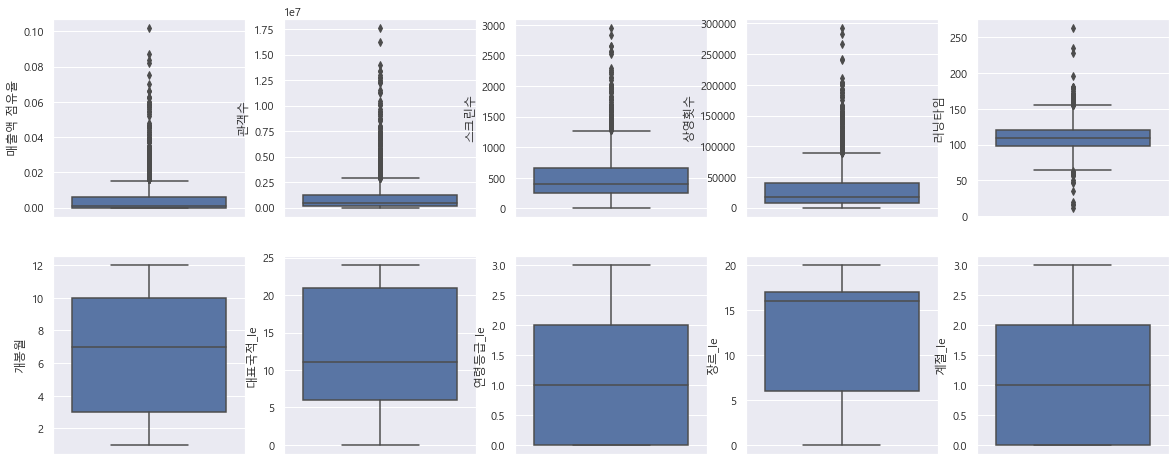

In [67]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (20, 8)})
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(ncols=5, nrows=2)
sns.boxplot(y='매출액 점유율', data=df_ml, ax=ax[0, 0])
sns.boxplot(y='관객수', data=df_ml, ax=ax[0, 1])
sns.boxplot(y='스크린수', data=df_ml, ax=ax[0, 2])
sns.boxplot(y='상영횟수', data=df_ml, ax=ax[0, 3])
sns.boxplot(y='러닝타임', data=df_ml, ax=ax[0, 4])
sns.boxplot(y='개봉월', data=df_ml, ax=ax[1, 0])
sns.boxplot(y='대표국적_le', data=df_ml, ax=ax[1, 1])
sns.boxplot(y='연령등급_le', data=df_ml, ax=ax[1, 2])
sns.boxplot(y='장르_le', data=df_ml, ax=ax[1, 3])
sns.boxplot(y='계절_le', data=df_ml, ax=ax[1, 4])

#### 상관관계

In [32]:
import seaborn as sns

corr_mat = df_ml.corr().round(1)
corr_mat

,순위,매출액,매출액 점유율,관객수,스크린수,상영횟수,러닝타임,개봉월,대표국적_le,연령등급_le,장르_le,계절_le
순위,1.0,-0.7,-0.6,-0.7,-0.7,-0.8,-0.3,-0.0,-0.1,0.2,-0.0,-0.1
매출액,-0.7,1.0,0.7,1.0,0.7,0.9,0.3,0.0,0.1,-0.2,0.0,0.1
매출액 점유율,-0.6,0.7,1.0,0.7,0.6,0.8,0.3,0.0,0.1,-0.2,0.0,0.1
관객수,-0.7,1.0,0.7,1.0,0.6,0.9,0.3,0.0,0.1,-0.2,0.0,0.1
스크린수,-0.7,0.7,0.6,0.6,1.0,0.8,0.3,0.1,0.1,-0.2,0.1,0.1
상영횟수,-0.8,0.9,0.8,0.9,0.8,1.0,0.3,-0.0,0.1,-0.2,0.0,0.1
러닝타임,-0.3,0.3,0.3,0.3,0.3,0.3,1.0,0.0,-0.0,-0.2,-0.0,0.0
개봉월,-0.0,0.0,0.0,0.0,0.1,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.3
대표국적_le,-0.1,0.1,0.1,0.1,0.1,0.1,-0.0,0.0,1.0,0.0,-0.1,-0.0
연령등급_le,0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.0,0.0,1.0,0.0,-0.0


In [33]:
abs(corr_mat) > 0.5

,순위,매출액,매출액 점유율,관객수,스크린수,상영횟수,러닝타임,개봉월,대표국적_le,연령등급_le,장르_le,계절_le
순위,True,True,True,True,True,True,False,False,False,False,False,False
매출액,True,True,True,True,True,True,False,False,False,False,False,False
매출액 점유율,True,True,True,True,True,True,False,False,False,False,False,False
관객수,True,True,True,True,True,True,False,False,False,False,False,False
스크린수,True,True,True,True,True,True,False,False,False,False,False,False
상영횟수,True,True,True,True,True,True,False,False,False,False,False,False
러닝타임,False,False,False,False,False,False,True,False,False,False,False,False
개봉월,False,False,False,False,False,False,False,True,False,False,False,False
대표국적_le,False,False,False,False,False,False,False,False,True,False,False,False
연령등급_le,False,False,False,False,False,False,False,False,False,True,False,False


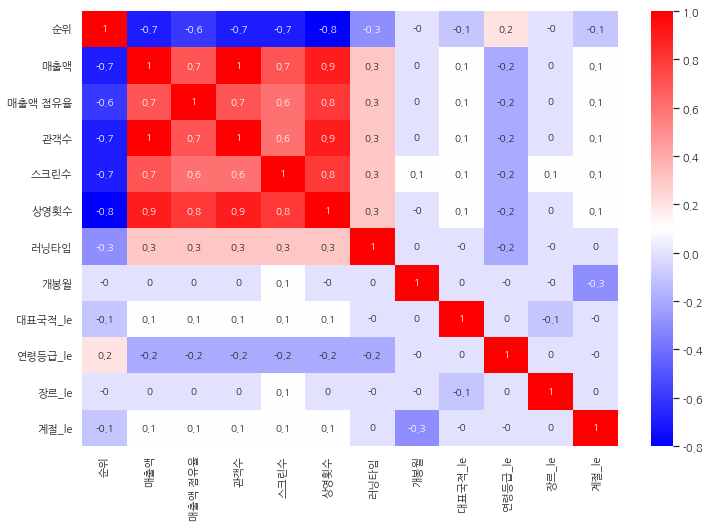

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=corr_mat, annot=True, cmap='bwr');

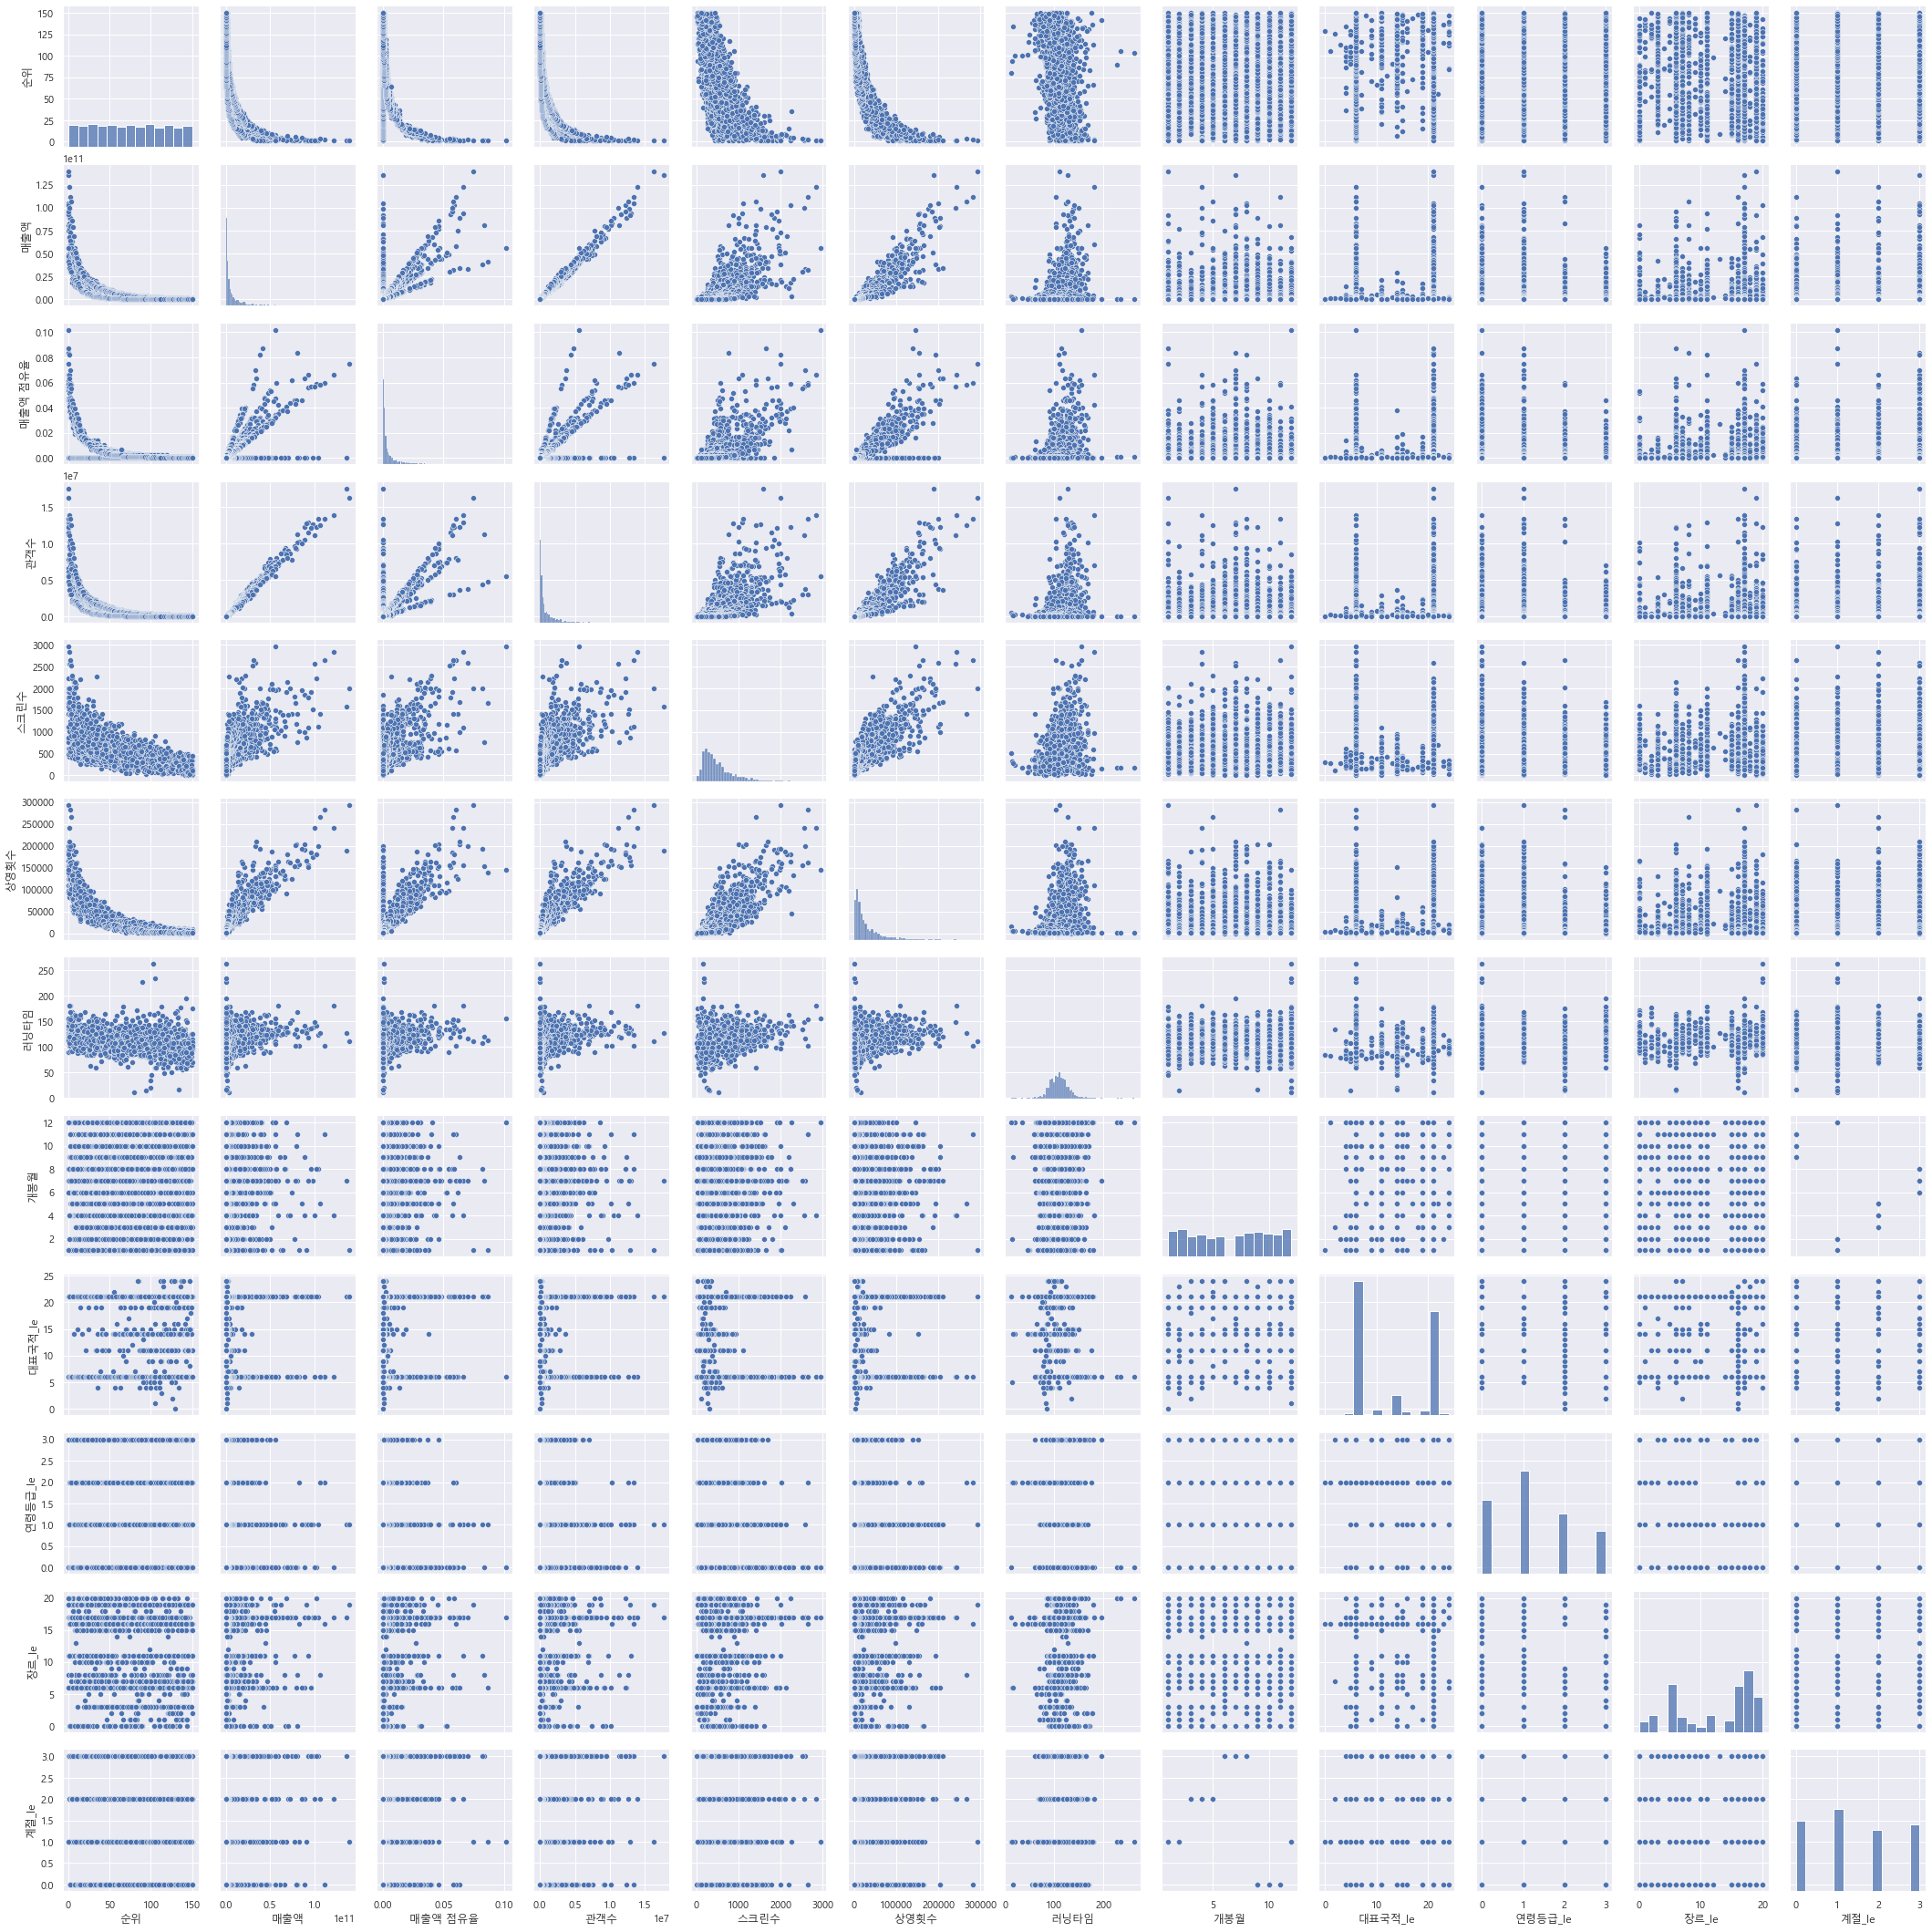

In [29]:
sns.pairplot(data=df_ml);

<AxesSubplot:xlabel='계절_le', ylabel='매출액'>

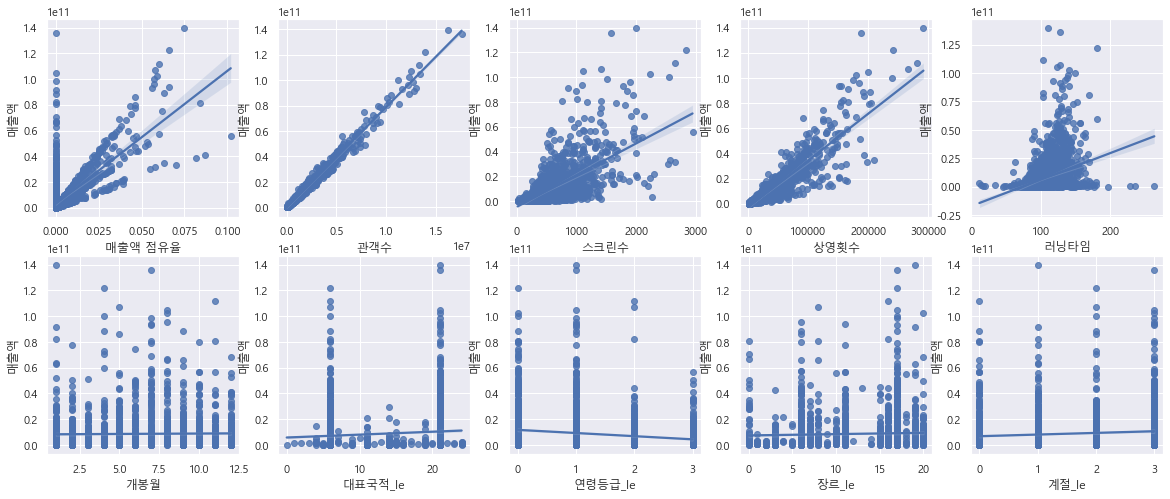

In [59]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (20, 8)})
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(ncols=5, nrows=2)
sns.regplot(x='매출액 점유율', y='매출액', data=df_ml, ax=ax[0, 0])
sns.regplot(x='관객수', y='매출액', data=df_ml, ax=ax[0, 1])
sns.regplot(x='스크린수', y='매출액', data=df_ml, ax=ax[0, 2])
sns.regplot(x='상영횟수', y='매출액', data=df_ml, ax=ax[0, 3])
sns.regplot(x='러닝타임', y='매출액', data=df_ml, ax=ax[0, 4])
sns.regplot(x='개봉월', y='매출액', data=df_ml, ax=ax[1, 0])
sns.regplot(x='대표국적_le', y='매출액', data=df_ml, ax=ax[1, 1])
sns.regplot(x='연령등급_le', y='매출액', data=df_ml, ax=ax[1, 2])
sns.regplot(x='장르_le', y='매출액', data=df_ml, ax=ax[1, 3])
sns.regplot(x='계절_le', y='매출액', data=df_ml, ax=ax[1, 4])

#### OLS 분석

In [30]:
from statsmodels.formula.api import ols

In [47]:
df_ml.columns

Index(['순위', '매출액', '매출액 점유율', '관객수', '스크린수', '상영횟수', '러닝타임', '개봉월', '대표국적_le',
       '연령등급_le', '장르_le', '계절_le'],
      dtype='object')

In [44]:
# ols를 위해 컬럼명 공백 제거
df_ml_ols = df_ml.rename(columns={'매출액 점유율':'매출액_점유율'})

In [48]:
ols('매출액 ~ 매출액_점유율 + 관객수 + 스크린수 + 상영횟수 + 러닝타임 + 개봉월 + 대표국적_le + 연령등급_le + 장르_le + 계절_le', data=df_ml_ols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.592e+04
Date:                Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:28:44   Log-Likelihood:                -46740.
No. Observations:                2086   AIC:                         9.350e+04
Df Residuals:                    2075   BIC:                         9.356e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.316e+08   2.18e+08     -1.978      0.048   -8.59e+08   -3.78e+06
매출액_점유율    -7.492e+09   4.49e+09     -1.669      0.095   -1.63e+10    1.31e+09
관객수         7331.8336     37.411    195.978      0.000    7258.466    7405.202
스크린수         2.01e+06   1.31e+05     15.333      0.000    1.75e+06    2.27e+06
상영횟수        1.993e+04   2630.636      7.577      0.000    1.48e+04    2.51e+04
러닝타임       -3.648e+06   1.57e+06     -2.327      0.020   -6.72e+06   -5.74e+05
개봉월        -2.089e+06   8.51e+06     -0.245      0.806   -1.88e+07    1.46e+07
대표국적_le    -3.474e+07   4.15e+06     -8.375      0.000   -4.29e+07   -2.66e+07
연령등급_le     8.344e+07   2.94e+07      2.836      0.005    2.57e+07    1.41e+08
장르_le       4.863e+06   4.95e+06      0.982      0.326   -4.85e+06    1.46e+07
계절_le      -2.286e+07   2.75e+07     -0.830      0.407   -7.69e+07    3.11e+07
==============================================================================
Omnibus:                      774.211   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45576.636
Skew:                           0.926   Prob(JB):                         0.00
Kurtosis:                      25.824   Cond. No.                     3.38e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Df Residuals: 자유도(전체 표본 수 - 종속변수1개 - 독립변수10개)
- Df Model: 독립변수의 개수
- R-squared: 결정계수 --> 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율, 회귀식의 설명력을 나타낸다.
- Adj. R-squared: 회귀분석은 변수가 추가될 때 항상 설명력이 올라가기만 하기 때문에, 설명력에 영향이 거의 없는 변수라 할지라도 결과적으로 설명력을 높혀 모델의 설명력이 실제보다 높게 나올 수 있다. 따라서 독립변수의 개수에 따라 R-squared를 조정해줘야 한다.
- F-statistics: F통계량을 뜻한다. F통계량은 MSR/MSE로 구할 수 있다. 도출된 회귀식이 통계적으로 유의한지 확인. 0에 가까울수록 좋음
- Prob: F통계량에 해당하는 P-value를 의미한다. 회귀식이 유의미한지 확인. 0.05 이하일 경우 유의한 것으로 판단
- Log-Likelihood: 로그우도, 생성된 모델이 주어진 데이터를 생성할 가능성의 수치적 기표. 모델을 생성하는 과정에서 각 변수에 대한 계수값을 비교할 때 사용
- AIC, BIC: Log-Likelihood를 독립변수의 수로 보정한 값, 값이 작을 수록 좋음
  - AIC: 표본의 개수와 모델의 복잡성을 기반으로 모델을 평가하며, 수치가 낮을 수록 좋음
  - BIC: AIC와 유사하나 패널티를 부여하여 AIC보다 모델 평가 성능이 더 좋으며, 수치가 낮을 수록 좋음
- Intercept coef: 회귀식의 절편값
- 각 column의 coef: 각 독립변수의 회귀계수(기울기)
- std err: 계수의 표준오차(표본 통계량의 표준 편차), 값이 작을 수록 좋음
- t: 독립변수와 종속변수간에 선형관계(관련성)가 존재하는 정도, 값이 클수록 상관도가 큼
  - t 값이 크다 = 표준 편차가 작다 = 독립-종속변수 간 상관도 높음
  - t 값이 작다 = 표준 편차가 크다 = 독립-종속변수 간 상관도 낮음
- P>|t|: p-value(유의확률), 귀무가설이 맞다고 가정할 때 얻은 결과보다 극단적인 결과가 실제로 관측될 확률, 일반적으로 유의수준 5%보다 p값이 작으면(p < 0.05), “통계적으로 유의미하다”고 판단
- Omnibus: 디아고스티노 검정(귀무가설 검정), 비대칭도와 첨도를 결합한 정규성 테스트, 값이 클수록 정규 분포를 따른다는 의미
- Prob(Omnibus): 디아고스티노 검정이 유의한지 판단, 0.05 이하일 경우 유의하다고 판단
- Skew: 왜도, 평균 주위의 잔차들의 대칭하는지를 보는 것이며, 0에 가까울수록 대칭
- Kurtosis: 첨도, 잔차들의 분포 모양이며, 3에 가까울 수록 정규분포이다. (음수이면 평평한 형태, 양수는 뾰족한 형태)

---

## 모델링

#### Train, Test 분할

In [49]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('매출액', axis=1)
y = df_ml['매출액']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#### 학습

In [51]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

#### 모델 평가 위한 RMS

In [52]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

In [53]:
print('RMSE train : ', rmse_tr)
print('RMSE test : ', rmse_test)

RMSE train :  1122714981.3847005
RMSE test :  1418602668.3763466


#### 성능 확인

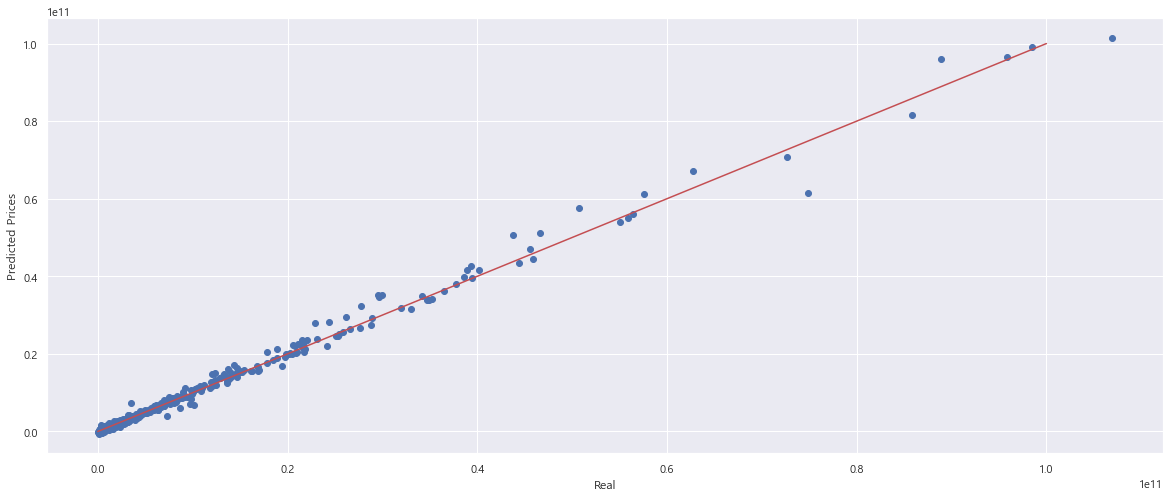

In [56]:
plt.scatter(y_test, pred_test)
plt.xlabel('Real')
plt.ylabel('Predicted Prices')
plt.plot([0, 1e+11], [0, 1e+11], 'r')
plt.show()

---

### 개봉월, 대표국적_le, 연령등급_le, 장르_le, 계절_le 제외하고 다시 수행

#### Train, Test 분할

In [57]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(['매출액', '대표국적_le', '연령등급_le', '장르_le', '계절_le'], axis=1)
y = df_ml['매출액']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#### 학습

In [89]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

#### RMS

In [90]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE train : ', rmse_tr)
print('RMSE test : ', rmse_test)

RMSE train :  1145453299.4160461
RMSE test :  1433602573.192456


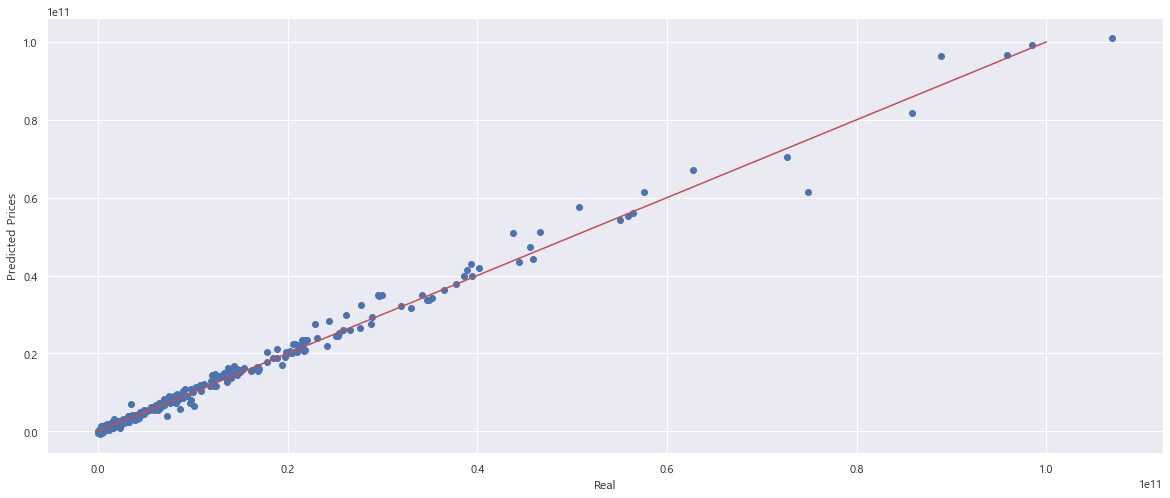

In [62]:
plt.scatter(y_test, pred_test)
plt.xlabel('Real')
plt.ylabel('Predicted Prices')
plt.plot([0, 1e+11], [0, 1e+11], 'r')
plt.show()

In [91]:
print('모델 정확도 : ', reg.score(X_test, y_test))

모델 정확도 :  0.9912582706247848


---

## 스케일 적용하기

In [63]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

#### MinMaxScaler

In [86]:
mm.fit(X_train)
X_train_mm = mm.transform(X_train)
X_test_mm = mm.transform(X_test)
reg.fit(X_train_mm, y_train)
print('모델 정확도 : ', reg.score(X_test_mm, y_test))

모델 정확도 :  0.9912582706241859


#### StandardScaler

In [93]:
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)
reg.fit(X_train_ss, y_train)
print('모델 정확도 : ', reg.score(X_test_ss, y_test))

모델 정확도 :  0.9912582706241859


#### RobustScaler

In [94]:
rs.fit(X_train)
X_train_rs = rs.transform(X_train)
X_test_rs = rs.transform(X_test)
reg.fit(X_train_rs, y_train)
print('모델 정확도 : ', reg.score(X_test_rs, y_test))

모델 정확도 :  0.9912582706241859


- 스케일링을 진행해도 변화가 없다;;;

---

### 러닝타임과 매출액 correlation 0.3 따로 ML 수행

#### 데이터 분할

In [127]:
from sklearn.model_selection import train_test_split

X = df_ml[['러닝타임']]
y = df_ml['매출액']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#### 학습

In [129]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

#### RMS

In [130]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

In [131]:
print('RMSE train : ', rmse_tr)
print('RMSE test : ', rmse_test)

RMSE train :  13740799336.341608
RMSE test :  14322509570.0702


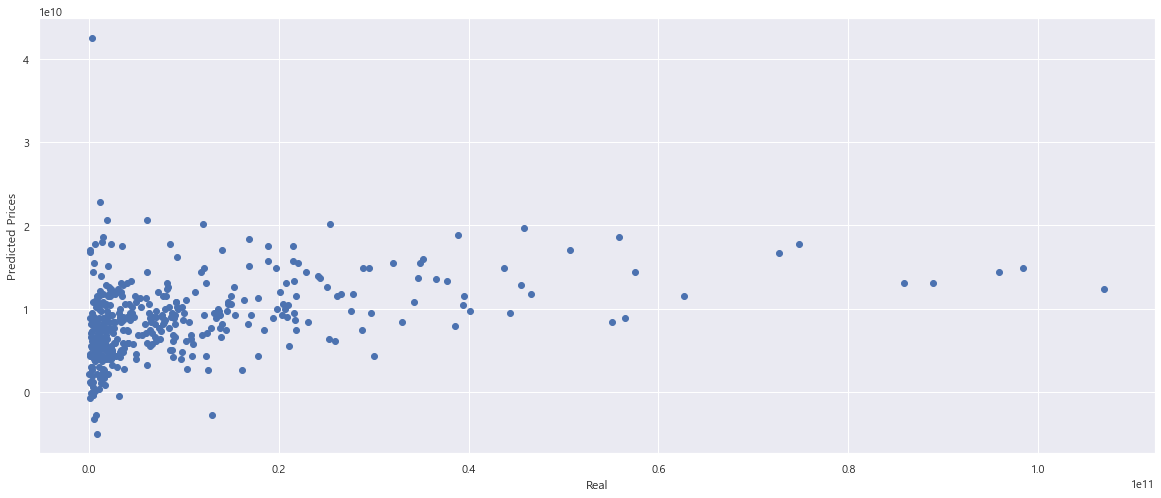

In [133]:
plt.scatter(y_test, pred_test)
plt.xlabel('Real')
plt.ylabel('Predicted Prices')
plt.show()

In [134]:
print('모델 정확도 : ', reg.score(X_test, y_test))

모델 정확도 :  0.12747464504554085


- 실패....

---

### XGBRegressor 적용

In [135]:
import xgboost

#### 데이터 분할

In [136]:
X = df_ml.drop('매출액', axis=1)
y = df_ml['매출액']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#### 학습

In [138]:
xgbr = xgboost.XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

#### Column별 중요도

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

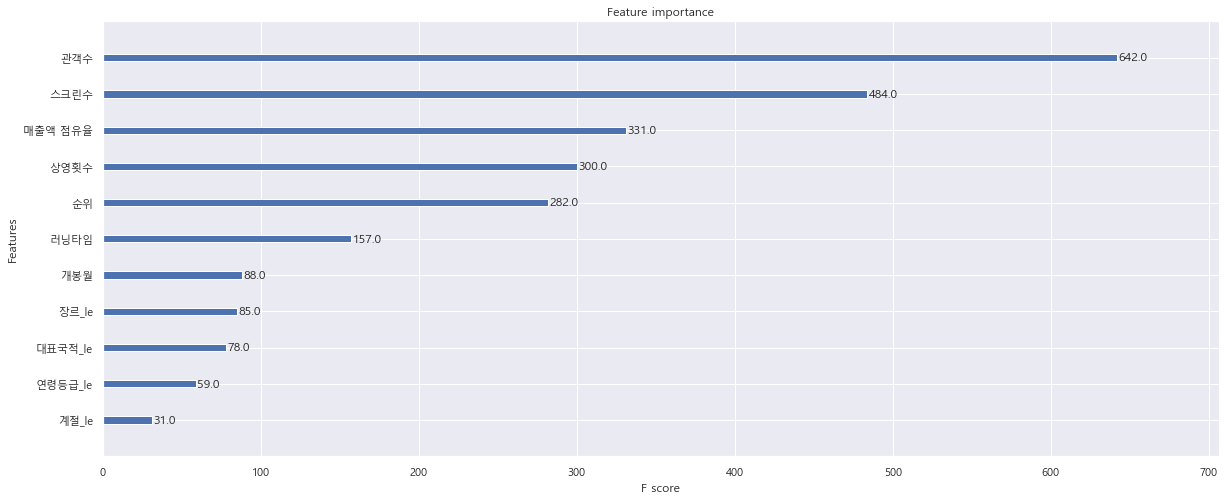

In [139]:
xgboost.plot_importance(xgbr)

#### 예측

In [140]:
pred = xgbr.predict(X_test)
pred

array([2.82531574e+10, 6.02257920e+09, 1.18147264e+09, 4.21361024e+08,
       1.19318618e+09, 1.02894728e+08, 2.01110221e+09, 3.92620416e+09,
       5.62097728e+08, 3.80764406e+10, 3.65407068e+10, 5.42864486e+09,
       8.90687386e+09, 1.61633651e+09, 3.72160736e+08, 5.73900224e+08,
       1.06718675e+09, 1.00138362e+09, 1.01474099e+10, 3.13272955e+10,
       1.30428774e+09, 1.49840568e+10, 1.23186381e+09, 6.20858214e+09,
       1.29918221e+09, 2.19546563e+10, 7.71936461e+09, 1.97831823e+10,
       1.17686159e+10, 9.13214976e+09, 1.32629688e+10, 1.04470118e+11,
       1.66159145e+10, 1.68486707e+09, 3.12985887e+10, 2.85569568e+08,
       2.54677581e+09, 6.79572429e+09, 1.02152249e+11, 1.48102106e+09,
       1.08681152e+09, 8.09445990e+09, 3.89440819e+09, 1.18064937e+10,
       1.70851568e+08, 5.33508160e+08, 3.57770419e+09, 3.19951846e+09,
       5.73657293e+09, 3.43109888e+09, 2.19930752e+09, 3.84081152e+09,
       7.31774310e+09, 6.81377984e+08, 1.46006874e+09, 9.17381632e+09,
      

In [142]:
r_sq = xgbr.score(X_train, y_train)
print(r_sq)

0.9995641721536954


- 일반 reg모델과 비교하면, 0.991258에서 0.999564까지 스코어가 오른 것을 확인!

In [143]:
pred_tr = xgbr.predict(X_train)
pred_test = xgbr.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE train : ', rmse_tr)
print('RMSE test : ', rmse_test)

RMSE train :  300949126.6067531
RMSE test :  1477006887.5055053


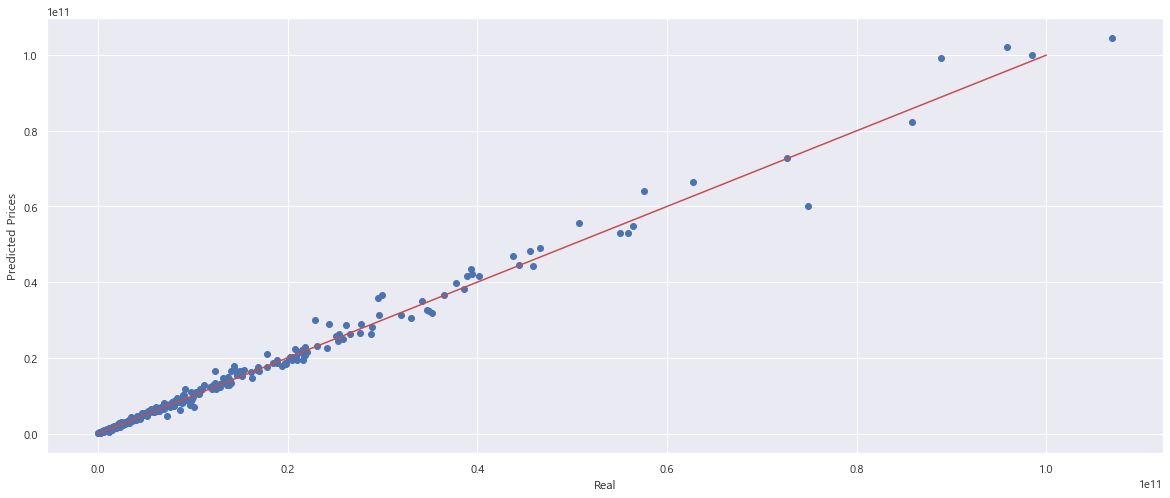

In [145]:
plt.scatter(y_test, pred_test)
plt.xlabel('Real')
plt.ylabel('Predicted Prices')
plt.plot([0, 1e+11], [0, 1e+11], 'r')
plt.show()